<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classificação-Multi-Classe" data-toc-modified-id="Classificação-Multi-Classe-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classificação Multi-Classe</a></span><ul class="toc-item"><li><span><a href="#Lendo-e-Explorando-os-Dados" data-toc-modified-id="Lendo-e-Explorando-os-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Lendo e Explorando os Dados</a></span></li><li><span><a href="#Visualizando-os-Dados" data-toc-modified-id="Visualizando-os-Dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizando os Dados</a></span></li><li><span><a href="#Função-Custo" data-toc-modified-id="Função-Custo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Função Custo</a></span></li><li><span><a href="#Nova-Abordagem-Binária" data-toc-modified-id="Nova-Abordagem-Binária-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Nova Abordagem Binária</a></span><ul class="toc-item"><li><span><a href="#Função-Custo" data-toc-modified-id="Função-Custo-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Função Custo</a></span></li><li><span><a href="#Gradiente" data-toc-modified-id="Gradiente-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Gradiente</a></span></li><li><span><a href="#Otimizando-Modelo" data-toc-modified-id="Otimizando-Modelo-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Otimizando Modelo</a></span></li></ul></li><li><span><a href="#Classificador-Multi-Classe" data-toc-modified-id="Classificador-Multi-Classe-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Classificador Multi Classe</a></span></li><li><span><a href="#Predizendo-e-Medindo-Performance" data-toc-modified-id="Predizendo-e-Medindo-Performance-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Predizendo e Medindo Performance</a></span></li><li><span><a href="#Pipeline-Completo-(Treino-e-Teste)" data-toc-modified-id="Pipeline-Completo-(Treino-e-Teste)-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Pipeline Completo (Treino e Teste)</a></span></li></ul></li><li><span><a href="#Scikit-Learn" data-toc-modified-id="Scikit-Learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scikit Learn</a></span><ul class="toc-item"><li><span><a href="#Treinando-um-Modelo" data-toc-modified-id="Treinando-um-Modelo-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Treinando um Modelo</a></span></li><li><span><a href="#Medindo-Performance" data-toc-modified-id="Medindo-Performance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Medindo Performance</a></span></li><li><span><a href="#Pipeline-Completo" data-toc-modified-id="Pipeline-Completo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Pipeline Completo</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo alocar o desenvolvimento do ```exercicio 3``` proposto pelo curso de Aprendizagem Automática. Na primeira parte do exercício, será implementado o algoritmo de Regressão Logística com várias classes (one vs all). Na segunda parte do exercício, é encontrado um problema onde será necessária a utilização de um modelo de Redes Neurais

## Classificação Multi-Classe

Em ambas as partes, o problema de negócio é o mesmo: aplicar classificação a um dataset contendo dígitos manuscritos de 0 a 9. Neste primeiro momento, o problema será resolvido através do algoritmo de ```Regressão Logística```.

### Lendo e Explorando os Dados

In [1]:
# Importando biblioteca e lendo arquivo
import numpy as np
import scipy.io as sio

# Lendo arquivo
data = sio.loadmat('ex3data1.mat')

Fonte: [scipy.io.loadmat()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)

In [2]:
# Verificando resultado
data

{'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
# Separando em partes
X = data['X']
y = data['y']

In [4]:
# Verificando dimensões
print(f'Dimensões do dataset: {X.shape}')
print(f'Labels: {y.shape}')

Dimensões do dataset: (5000, 400)
Labels: (5000, 1)


Temos 5000 linhas e 400 features! Realmente trata-se de um dataset de imagens (provavelmente 20 x 20 pixels). Cada feature representa a intensidade de um pixel referente a imagem, variando de 0 a 255.

### Visualizando os Dados

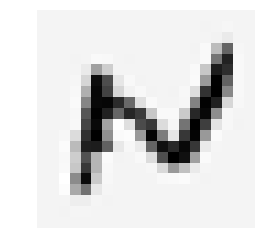

In [5]:
# Visualizando os dados
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

digito = X[2500]
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

Mas que imagem seria essa? Vamos verificar seu label

In [6]:
# Label
y[2500]

array([5], dtype=uint8)

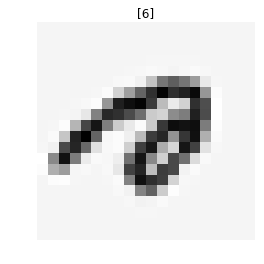

In [7]:
# Verificando outro digito
digito = X[3000]
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[3000]
plt.axis('off')
plt.title(label)
plt.show()

Aparentemente as imagens estão invertidas!?

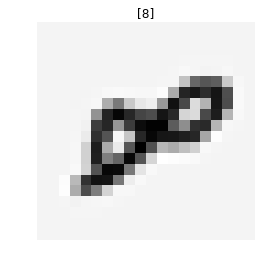

In [8]:
# Outra tentativa
digito = X[4000]
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[4000]
plt.axis('off')
plt.title(label)
plt.show()

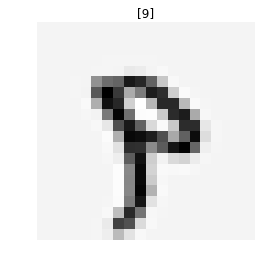

In [9]:
# Tentando após pesquisas
from scipy import ndimage

digito = X[4500]
imagem_digito = digito.reshape(20, 20)
plt.imshow(ndimage.rotate(imagem_digito, -90), cmap=matplotlib.cm.binary, 
           interpolation='nearest')
label = y[4500]
plt.axis('off')
plt.title(label)
plt.show()

Fonte: [scipy.ndimage.rotate](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html) não surtiu efeito.

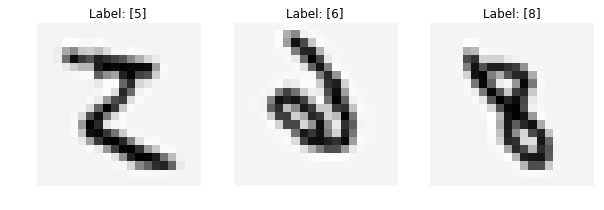

In [10]:
# Verificando para os demais
i = 0
digitos = [2500, 3000, 4000]
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for axe in ax:
    digito = X[digitos[i]]
    imagem_digito = digito.reshape(20, 20)
    axe.imshow(ndimage.rotate(imagem_digito, -90), cmap=matplotlib.cm.binary,
              interpolation='nearest')
    label = y[digitos[i]]
    axe.set_title(f'Label: {label}')
    axe.axis('off')
    i+=1
plt.show()

Ao que tudo indica, as imagens não estavam simplismente rotacionadas, mas sim ```espelhadas!```.  Como consertar?

In [11]:
# Pesquisas
from PIL import Image

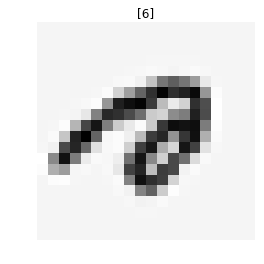

In [12]:
digito = X[3000]
rotated_image = digito.transpose(Image.FLIP_LEFT_RIGHT)
imagem_digito = digito.reshape(20, 20)
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[3000]
plt.axis('off')
plt.title(label)
plt.show()

Fonte: [PIL.Image](https://www.blog.pythonlibrary.org/2017/10/05/how-to-rotate-mirror-photos-with-python/) não surtiu efeito.

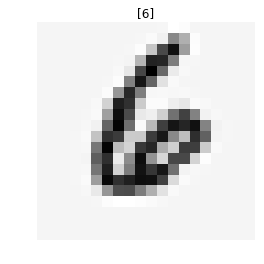

In [13]:
# Mais uma tentativa
digito = X[3000]
imagem_digito = digito.reshape(20, 20).T
plt.imshow(imagem_digito, cmap=matplotlib.cm.binary, interpolation='nearest')
label = y[3000]
plt.axis('off')
plt.title(label)
plt.show()

Opa! Será!?

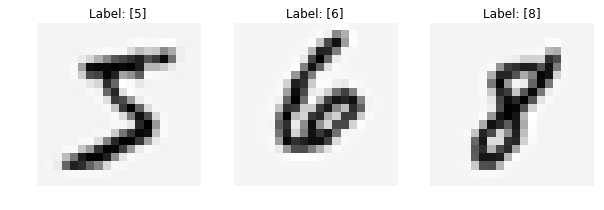

In [14]:
# Verificando para os demais
i = 0
digitos = [2500, 3000, 4000]
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for axe in ax:
    digito = X[digitos[i]]
    imagem_digito = digito.reshape(20, 20).T
    axe.imshow(imagem_digito, cmap=matplotlib.cm.binary,
              interpolation='nearest')
    label = y[digitos[i]]
    axe.set_title(f'Label: {label}')
    axe.axis('off')
    i+=1
plt.show()

__Perfeito!__ Compartilhando suspeita:

Como a imagem estava espelhada, a suspeita levantada era que, de alguma forma, os dados das colunas estavam localizados nas linhas da matriz que representa a imagem (e vice e versa). Em outras palavras, significa dizer que os pixels brilhantes que deveriam estar nas colunas, estavam nas linhas, assim como os pixels brilhantes que estavam nas linhas, deveriam estar nas colunas.

Para confirmar a suspeita, foi aplicada uma transposição na matriz da imagem após o ```.reshape(20, 20)```, transformando o que é linha, em coluna e o que é coluna, em linha.

__Plotando grid de imagens:__

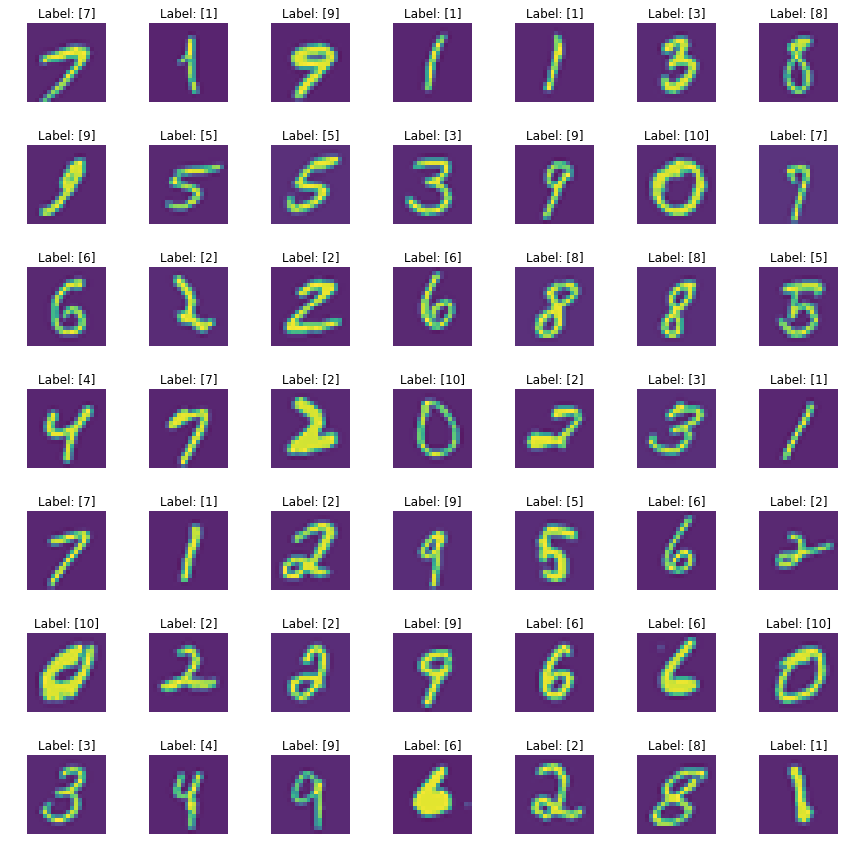

In [15]:
# settings
h, w = 10, 10        # for raster image
nrows, ncols = 7, 7  # array of sub-plots
figsize = [12, 12]     # figure size, inches

# prep (x,y) for extra plotting on selected sub-plots
xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
ys = np.abs(np.sin(xs))           # absolute of sine

# create figure (fig), and array of axes (ax)
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# plot simple raster image on each sub-plot
for i, axi in enumerate(ax.flat):
    # i runs from 0 to (nrows*ncols-1)
    # axi is equivalent with ax[rowid][colid]
    rnd = np.random.randint(0, 5000)
    img = X[rnd].reshape(20, 20).T
    axi.imshow(img, alpha=0.9)
    # get indices of row/column
    rowid = i // ncols
    colid = i % ncols
    # write row/col indices as axes' title for identification
    #axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))
    label = y[rnd]
    axi.set_title(f'Label: {label}')
    axi.axis('off')

# one can access the axes by ax[row_id][col_id]
# do additional plotting on ax[row_id][col_id] of your choice
#ax[0][2].plot(xs, 3*ys, color='red', linewidth=3)
#ax[4][3].plot(ys**2, xs, color='green', linewidth=3)

plt.tight_layout(True)
plt.show()

### Função Custo

Como sempre, antes de definir a função custo, vamos definir a função sigmoidal

In [16]:
# Definindo função sigmoidal
def sigmoid(z):
    """Função sigmoidal para cálculo da função hyothesis
    Input: 
        z: X.dot(theta)
    Output:
        h = função sigmoidal"""
    return 1 / (1 + np.exp(-z))

In [17]:
# Testando
[m, n] = X.shape
theta_inicial = np.zeros((n, 1))
theta_inicial.shape

(400, 1)

In [18]:
# Calculando z
z = X.dot(theta_inicial)
h = sigmoid(z)
h[:5]

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

__Função Custo__:

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
\end{equation*}

In [19]:
# Termo 1
termo1 = np.log(h).T.dot(-y)
termo1

array([[-868166.84365133]])

In [20]:
# Termo 2
termo2 = np.log(1 - h).T.dot(1 - y)
termo2

array([[-782909.74044246]])

In [21]:
termo1 - termo2

array([[-85257.10320887]])

Já é possível identificar um problema: y varia de 1 a 10. Não queremos isso.

In [22]:
# Valores únicos do array
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [23]:
# Verificando primeiras linhas
y[:5]

array([[10],
       [10],
       [10],
       [10],
       [10]], dtype=uint8)

In [24]:
y_reshaped = y.reshape(-1)
y_reshaped

array([10, 10, 10, ...,  9,  9,  9], dtype=uint8)

In [25]:
# Verificando se é um 0
y_mod = (y_reshaped == 10)
y_mod[:5]

array([ True,  True,  True,  True,  True])

In [26]:
# Multiplicando por 1
y_mod * 1

array([1, 1, 1, ..., 0, 0, 0])

In [27]:
# Testando um procedimento já realizado
bias = np.ones((m, 1))
np.c_[(bias, y_mod)]

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [28]:
# Testando pra mais de uma concatenação
zeros = np.zeros((m, 1))
np.c_[(zeros, bias, y_mod)]

array([[0., 1., 1.],
       [0., 1., 1.],
       [0., 1., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [29]:
# Realizando o procedimento para todas as classes
y_10 = (y_reshaped == 10)
y_9 = (y_reshaped == 9)
stack = np.c_[(y_9, y_10)]

for i in range(len(np.unique(y))-2, 0, -1):
    y_i = (y_reshaped == i)
    stack = np.c_[(y_i, stack)]

In [30]:
y_encoded = stack * 1
y_encoded

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [31]:
# Verificando últimas linhas de y
y[:-5]

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [32]:
# Verificando novo shape
y_encoded.shape

(5000, 10)

In [33]:
# Verificando dados
X.shape

(5000, 400)

In [34]:
# Adicionando termo bias
m = X.shape[0]
bias = np.ones((m))
X_train = np.c_[(bias, X)]

# Nova matriz de parâmetros
n = X_train.shape[1]
labels = y_encoded.shape[1]
all_theta = np.zeros((labels, n))

In [35]:
# Verificando
all_theta.shape

(10, 401)

In [36]:
# X após bias
X_train.shape

(5000, 401)

In [37]:
# Labels
y_encoded.shape

(5000, 10)

In [38]:
# Testando previsão
X_train.dot(all_theta.T)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Dimensões
X_train.dot(all_theta.T).shape

(5000, 10)

In [40]:
# Testando termos da função custo
y_encoded - X_train.dot(all_theta.T)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [42]:
h = sigmoid(X_train.dot(all_theta.T))
np.log(h).T.dot(-y)

array([[-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132],
       [-868166.84365132]])

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
\end{equation*}

In [43]:
np.log(1 - h).T.dot(1 - y)

array([[-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243],
       [-782909.74044243]])

In [44]:
#!/usr/local/Cellar/python/2.7.6/bin/python
# -*- coding: utf-8 -*-

import sys

import scipy.misc, scipy.optimize, scipy.io, scipy.special
from numpy import *

def sigmoid( z ):
	return scipy.special.expit(z)
	# return 1.0 / (1.0 + exp( -z ))

def computeCost( theta, X, y, lamda ):
	m = shape( X )[0]
	hypo 	   = sigmoid( X.dot( theta ) )
	term1 	   = log( hypo ).dot( -y )
	term2 	   = log( 1.0 - hypo ).dot( 1 - y )
	left_hand  = (term1 - term2) / m
	right_hand = theta.T.dot( theta ) * lamda / (2*m)
	return left_hand + right_hand

def gradientCost( theta, X, y, lamda ):
	m = shape( X )[0]
	grad = X.T.dot( sigmoid( X.dot( theta ) ) - y ) / m
	grad[1:] = grad[1:] + ( (theta[1:] * lamda ) / m )
	return grad

def oneVsAll( X, y, num_classes, lamda ):
	m,n 		= shape( X )
	X 			= c_[ones((m, 1)), X]
	all_theta 	= zeros((n+1, num_classes))

	for k in range(0, num_classes):
		theta 			= zeros(( n+1, 1 )).reshape(-1)
		temp_y 			= ((y == (k+1)) + 0).reshape(-1)
		result 			= scipy.optimize.fmin_cg( computeCost, fprime=gradientCost, x0=theta, \
												  args=(X, temp_y, lamda), maxiter=50, disp=False, full_output=True )
		all_theta[:, k] = result[0]
		print("%d Cost: %.5f" % (k+1, result[1]))

	# save( "all_theta.txt", all_theta )
	return all_theta

def predictOneVsAll( theta, X, y ):
	m,n = shape( X )
	X 	= c_[ones((m, 1)), X]

	correct = 0
	for i in range(0, m ):
		prediction 	= argmax(theta.T.dot( X[i] )) + 1
		actual 		= y[i]
		# print "prediction = %d actual = %d" % (prediction, actual)
		if actual == prediction:
			correct += 1
	print("Accuracy: %.2f%%" % (correct * 100.0 / m ))

	
def part1_1():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y = mat['X'], mat['y']
	
def part1_2():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y = mat['X'], mat['y']

def part1_3():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y = mat['X'], mat['y']
	m, n = shape( X )
	input_layer_size = 400
	num_labels 		 = 10
	lamda 			 = 0.1

	theta = oneVsAll( X, y, num_labels, lamda )

def part1_4():
	mat = scipy.io.loadmat('ex3data1.mat')
	X, y 			 = mat['X'], mat['y']
	m, n 			 = shape( X )
	input_layer_size = 400
	num_labels 		 = 10
	lamda 			 = 0.1

	theta = oneVsAll( X, y, num_labels, lamda )
	predictOneVsAll( theta, X, y )



def main():
	set_printoptions(precision=6, linewidth=200)
	part1_1()
	part1_2()
	part1_3()
	part1_4()
	
if __name__ == '__main__':
	main()

1 Cost: 0.01517
2 Cost: 0.05689
3 Cost: 0.06408
4 Cost: 0.03721
5 Cost: 0.06125
6 Cost: 0.02077
7 Cost: 0.03378
8 Cost: 0.08479
9 Cost: 0.07967
10 Cost: 0.01046
1 Cost: 0.01517
2 Cost: 0.05689
3 Cost: 0.06408
4 Cost: 0.03721
5 Cost: 0.06125
6 Cost: 0.02077
7 Cost: 0.03378
8 Cost: 0.08479
9 Cost: 0.07967
10 Cost: 0.01046
Accuracy: 95.06%


In [45]:
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [46]:
temp_y = ((y == (+1)) + 0).reshape(-1)

In [47]:
temp_y[1000]

0

In [48]:
theta = np.zeros((n, 1)).reshape(-1)
theta.shape

(401,)

In [49]:
z = X_train.dot(theta)
h = sigmoid(z)
h.shape

(5000,)

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
\end{equation*}

In [50]:
t1 = np.log(h).T.dot(-y)
t1

array([-868166.843651])

In [51]:
t2 = np.log(1 - h).T.dot(1 - y)
t2

array([-782909.740442])

### Nova Abordagem Binária

Definindo função custo regularizada:

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
              + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

In [52]:
# Dados brutos de entrada
data = sio.loadmat('ex3data1.mat')

X = data['X']
y = data['y']

print(f'Dimensões de X: {X.shape}')
print(f'Dimensões de y: {y.shape}')

Dimensões de X: (5000, 400)
Dimensões de y: (5000, 1)


In [53]:
# Header de y
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

Para conseguir resultados efetivos através da métodologia ```One vs All```, vamos treinar um número ```k``` de classificadores de acordo com a quantidade ```K``` de labels possíveis. Neste caso, temos 10 classes diferentes (numerais de 0 a 10) e, portanto, vamos realizar o procedimento de treino para 10 possíveis casos.

In [54]:
# Testando para y = 1
y1 = (y == 1) * 1
y1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
# Aplicando reshape
y1 = y1.reshape(-1)
y1.shape

(5000,)

Agora temos um vetor de 5000 elementos, onde o 1 identifica os index onde o label é igual a classe (1, no caso)

In [56]:
# Procurando y = 1
y1[450:550]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Vamos considerar uma matriz de theta para este classificador binário.

In [57]:
# Adicionando bias
X_train = np.c_[(np.ones((m, 1)), X)]

# Matriz de theta
[m, n] = X_train.shape
theta1 = np.zeros((n, 1))
theta1 = theta1.reshape(-1)
theta1.shape

(401,)

Agora sim podemos calcular nossa função custo seguindo os meios normais!

In [58]:
# Calculando hypothesis
z = X_train.dot(theta)
h = sigmoid(z)
h.shape

(5000,)

In [59]:
# Verificnado
h[:5]

array([0.5, 0.5, 0.5, 0.5, 0.5])

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
              + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

In [60]:
# Calculando custo
lamda = 0.1
termo1 = np.log(h).T.dot(-y)
termo2 = np.log(1 - h).T.dot(1 - y)
unreg = termo1 - termo2
reg = (lamda/(2*m)) * theta.T.dot(theta)

J = unreg + reg

Para cada uma das classes, devemos:
    - Indexar corretamente o vetor y para uma única classe;
    - Criar um vetor de parâmetros específico considerando uma única classe;
    - Minimizar a função custo para obter os melhores parâmetros;
    - Finalizar treinamento do classificador binário;
    - Adicionar os parâmetros theta a uma matriz all_theta que irá contemplar todas as classes.

Para concluir os passos acima e, considerando ```K``` classificadores binários, devemos:
    - Definir uma função que compute o Custo;
    - Definir uma função que compute o Gradiente;
    - Definir uma função para minimizar o Custo e obter os melhores theta;
    - Definir uma função que englobe tudo isso.

#### Função Custo

\begin{equation*}
    J(\theta)=\frac{1}{m}\sum_{i=1}^{m}\left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -
              (1 - y^{(i)})\log{(1-h_\theta(x^{(i)}))}\right]
              + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2
\end{equation*}

In [123]:
def costFunction(theta, X, y, lamda):
    """ Função responsável por cálcular o custo de um treinamento,
    considerando um classificador binário de dígitos (K = 1)
    Input:
        theta: vetor de parâmetros de dimensões nx1 (classe única já indexada)
        X: dataset de dimensões mxn
        y: vetor de labels de dimensões mx1 (classe única já indexada)
        lamda: fator de regularização
    Output:
        J: custo do treinamento com os parâmetros indicados"""
    
    # Retornando variáveis de dimensão
    [m, n] = X.shape
    
    # Calculando hypothesis
    z = X.dot(theta)
    h = sigmoid(z)
    
    # Calculando custo
    termo1 = np.log(h).T.dot(y * (-1))
    termo2 = np.log(1 - h).T.dot(1 - y)
    unreg = termo1 - termo2
    reg = theta.T.dot(theta)
    
    return (unreg + reg) / m

In [94]:
# Testando para um classificar binário (digito = 1)
m = X.shape[0]
X_train = np.c_[(np.ones((m, 1)), X)]
n = X_train.shape[1]
y1 = ((y == 1) * 1).reshape(-1)
theta = np.zeros((n, 1)).reshape(-1)
lamda = 0.1

print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de y1: {y1.shape}')
print(f'Primeiras linhas de y: {y1[:15]}')
print(f'Dimensões de theta: {theta.shape}')

Dimensões de X_train: (5000, 401)
Dimensões de y1: (5000,)
Primeiras linhas de y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Dimensões de theta: (401,)


In [95]:
# Chamando função custo
J = costFunction(theta, X_train, y1, lamda)
print(f'Custo calculado: {J}')

Custo calculado: 0.6931471805599453


Antes de tomar qualquer conclusão, vamos calcular o gradiente e uma função de minimização.

#### Gradiente

\begin{equation*}
    \frac{\partial J(\theta)}{\partial\theta_j} = 
        \begin{cases} 
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right)
                & \mbox{para } j\mbox{ = 0} \\
            \left(\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\right) +
            \frac{\lambda}{m}\theta_j &\mbox{para } j\mbox{ >= 1}
        \end{cases}
\end{equation*}  

In [128]:
def gradient(theta, X, y, lamda):
    """ Função responsável por cálcular o gradiente (derivadas parciais)
    Input:
        theta: vetor de parâmetros de dimensão nx1
        X: features de dimensões mxn
        y: vetor de labels de dimensão mx1
        lamda: fator de regularização
    Output:
        grad: vetor de gradiente com todas as derivadas parciais (nx1)"""
    
    # Dimensões
    [m, n] = X.shape
    
    # Calculando gradiente
    z = X.dot(theta)
    h = sigmoid(z)
    grad = X.T.dot(h - y)
    grad[1:] = grad[1:] + (lamda/m)*theta[1:]
    
    return grad

In [129]:
# Testando
grad = gradient(theta, X_train, y1, lamda)

In [130]:
# Verificando erro
grad

array([ 2.000000e+03,  0.000000e+00,  0.000000e+00, -3.872651e-04,  2.458648e-03, -1.164701e-03,  2.984533e-01,  3.009640e-01,  5.768387e-02,  5.077351e-02,  1.090396e-01,  3.525355e-02,
       -2.711668e-02, -5.876744e-02, -1.043973e-01, -1.633717e-01, -1.179166e-01, -3.428309e-02, -2.318495e-04,  3.659450e-04,  0.000000e+00,  1.234001e-04, -1.050177e-03,  5.164639e-03,
       -9.293038e-02, -1.603880e-01,  4.210963e-01,  1.403214e+00,  2.035603e+00,  1.770619e+00,  6.711758e-01, -2.544750e-01, -5.341581e-01, -6.089224e-01, -7.218186e-01, -2.364683e-01,
       -2.408007e-02, -1.275915e-01, -1.350698e-01, -1.947951e-02, -4.429466e-03, -1.058610e-03,  1.148088e-02, -4.547858e-02,  2.353046e-01,  2.030169e+00,  7.085653e+00,  1.210085e+01,
        1.362964e+01,  1.014235e+01,  4.919109e+00,  3.149471e+00,  3.054058e+00,  8.242045e+00,  1.977360e+01,  2.523262e+01,  1.528244e+01,  4.861497e+00,  1.349668e+00, -5.223184e-02,
        1.578679e-02, -4.422862e-03,  1.585427e-03,  1.061581e-01

Aparentemente funcionou bem. Vamos verificar as dimensões do gradiente.

In [131]:
# Dimensões
grad.shape

(401,)

#### Otimizando Modelo

Nos dois últimos problemas realizados até aqui, utilizamos os módulos:
    - scipy.optimize.fmin()
    - scipy.optimize.minimize()

Para este problema, vamos utilizar o módulo
    - scipy.optimize.fmin_cg()
    
Fonte: [fmin_cg()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)

In [132]:
# Importando módulo
from scipy import optimize

In [133]:
# Verificando argumentos
help(optimize.fmin_cg)

Help on function fmin_cg in module scipy.optimize.optimize:

fmin_cg(f, x0, fprime=None, args=(), gtol=1e-05, norm=inf, epsilon=1.4901161193847656e-08, maxiter=None, full_output=0, disp=1, retall=0, callback=None)
    Minimize a function using a nonlinear conjugate gradient algorithm.
    
    Parameters
    ----------
    f : callable, ``f(x, *args)``
        Objective function to be minimized.  Here `x` must be a 1-D array of
        the variables that are to be changed in the search for a minimum, and
        `args` are the other (fixed) parameters of `f`.
    x0 : ndarray
        A user-supplied initial estimate of `xopt`, the optimal value of `x`.
        It must be a 1-D array of values.
    fprime : callable, ``fprime(x, *args)``, optional
        A function that returns the gradient of `f` at `x`. Here `x` and `args`
        are as described above for `f`. The returned value must be a 1-D array.
        Defaults to None, in which case the gradient is approximated
        numeri

In [134]:
# Vejamos
result = scipy.optimize.fmin_cg(computeCost, fprime=gradient, x0=theta,
                               args=(X_train, y1, lamda), maxiter=50,
                               disp=False, full_output=True)

In [135]:
# Verificando
result

(array([-2.976817e+00,  0.000000e+00,  0.000000e+00,  4.743128e-05, -4.374885e-04, -4.836378e-04,  5.123529e-04, -8.032833e-03,  2.064173e-03,  1.647083e-04,  4.781605e-04,  1.060046e-04,
         1.049490e-04,  3.733127e-04,  9.436163e-04,  5.024946e-03,  6.838518e-03,  5.758627e-04, -9.716843e-05, -1.284984e-07,  0.000000e+00, -3.290121e-08,  7.424094e-06, -6.178454e-04,
         4.899800e-03,  5.713410e-03,  1.233673e-03, -1.062939e-02,  1.946698e-03, -2.805185e-03, -9.091439e-03, -1.308430e-03, -7.696247e-04, -3.184170e-03, -4.638094e-03, -4.796835e-02,
        -6.814750e-02,  2.833493e-05,  4.839162e-03,  3.241187e-04,  1.420261e-04,  2.710534e-07, -1.396212e-04,  2.522784e-04,  1.244707e-02,  2.486628e-02,  3.318417e-02,  3.348459e-02,
        -4.796570e-02, -6.568554e-02, -2.630016e-02, -2.513165e-02, -2.189829e-03, -1.848592e-02, -1.542909e-01, -2.963157e-01, -2.610054e-01, -7.903695e-02,  2.648305e-02, -6.196077e-05,
        -6.713749e-04,  1.257922e-06,  3.835117e-04,  3.5728

In [137]:
# Interpretando resultado
theta = result[0]
cost = result[1]

print(f'Cost: {cost}')
print(f'Theta shape: {theta.shape}')

Cost: 0.01635050622036764
Theta shape: (401,)


### Classificador Multi Classe

Após o aparente sucesso na classificação binária, vamos expandir os cálculos para todas as classes.

In [142]:
# Retornando parâmetros
[m, n] = X_train.shape
lamda = 0.1
num_classes = 10
all_theta = np.zeros((n, num_classes))

for k in range(1, num_classes+1):
    theta = np.zeros((n, 1)).reshape(-1)
    y_class = ((y == k) * 1).reshape(-1)
    result = scipy.optimize.fmin_cg(computeCost, fprime=gradient, x0=theta,
                               args=(X_train, y_class, lamda), maxiter=50,
                               disp=False, full_output=True)
    all_theta[:, k-1] = result[0]
    print(f'Custo classe {k}: {result[1]}')

Custo classe 1: 0.01635050622036764
Custo classe 2: 0.05723545648365058
Custo classe 3: 0.062027568038251164
Custo classe 4: 0.03746326453019381
Custo classe 5: 0.06127988762752769
Custo classe 6: 0.022219525972190728
Custo classe 7: 0.03499951651049976
Custo classe 8: 0.08473976821922251
Custo classe 9: 0.08085955670177353
Custo classe 10: 0.011685368513978143


In [143]:
# Dimensões da matriz de theta
all_theta.shape

(401, 10)

In [144]:
# Encapsulando em uma função
def trainOneVsAll(X, y, num_classes, lamda):
    """Função responsável por realizar o treinamento utiliando o método One vs All
    Input:
        X: features de dimensões mxn+1
        y: vetor de labels de dimensões mx1
        num_classes: quantidade de classes do modelo
        lamda: fator de regularização"""
    
    # Criando matriz para alocar todos os num_classes vetores theta
    all_theta = np.zeros((n, num_classes))

    for k in range(1, num_classes+1):
        theta = np.zeros((n, 1)).reshape(-1)
        y_class = ((y == k) * 1).reshape(-1)
        result = scipy.optimize.fmin_cg(computeCost, fprime=gradient, x0=theta,
                                   args=(X_train, y_class, lamda), maxiter=50,
                                   disp=False, full_output=True)
        all_theta[:, k-1] = result[0]
        print(f'Custo classe {k}: {result[1]}')
    
    return all_theta

In [145]:
# Testando
full_theta = trainOneVsAll(X_train, y, 10, 0.1)
full_theta.shape

Custo classe 1: 0.01635050622036764
Custo classe 2: 0.05723545648365058
Custo classe 3: 0.062027568038251164
Custo classe 4: 0.03746326453019381
Custo classe 5: 0.06127988762752769
Custo classe 6: 0.022219525972190728
Custo classe 7: 0.03499951651049976
Custo classe 8: 0.08473976821922251
Custo classe 9: 0.08085955670177353
Custo classe 10: 0.011685368513978143


(401, 10)

### Predizendo e Medindo Performance

In [147]:
# Testando predições
y[2500]

5

In [149]:
# Predizendo um único elemento
full_theta.T.dot(X_train[2500])

array([-16.540549,  -9.767432,  -0.9958  , -17.21325 ,   0.391954, -11.495383,  -8.785016, -10.71215 ,  -8.692925, -12.631682])

In [150]:
# Qual o shape
full_theta.T.dot(X_train[2500]).shape

(10,)

O código acima indica que o índice do maior elemento desse vetor equivale a classe predita. Vejamos!

In [152]:
# Maior elemento
np.argmax(full_theta.T.dot(X_train[2500])) + 1

5

Devemos adicionar mais um, pois em Python a indexação começa por 0

Expandindo para todos os dados e contabilizando os acertos.

In [155]:
acertos = 0
for i in range(m):
    pred = np.argmax(full_theta.T.dot(X_train[i])) + 1
    if pred == y[i]:
        acertos += 1
print(f'Acertos: {acertos}')

Acertos: 4752


In [157]:
# Calculando acurácia
print(f'Acurácia: {100 * (acertos / m)}%')

Acurácia: 95.04%


In [158]:
# Encapsulando em uma função
def predictOneVsAll(X, y, theta):
    """Função responsável pela predição dos valores e cálculo da acurácia do modelo
    Input: 
        X: features nas dimensões mxn+1
        y: vetor de labels nas dimensões mx1
        theta: vetor de parâmetros (full_theta) nas dimensões nxnum_classes"""
    
    [m, n] = X.shape
    acertos = 0
    for i in range(m):
        pred = np.argmax(theta.T.dot(X_train[i])) + 1
        if pred == y[i]:
            acertos += 1
    acc = acertos / m
    return acc

In [160]:
# Testando
acc = predictOneVsAll(X_train, y, full_theta)
print(f'Acurácia final do modelo: {(100*acc):.2f}%')

Acurácia final do modelo: 95.04%


### Pipeline Completo (Treino e Teste)

In [1]:
# Importando bibliotecas
import numpy as np
import scipy.io as sio
import scipy.misc, scipy.optimize, scipy.io, scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Encapsulamento de todas as funções do modelo

# Função para separação dos dados
def split_data(X, y, test_ratio):
    """Função responsável por separar randomicamente o conjunto de dados
    Input:
        X: conjunto de dados (features)
        y: vetor de classificações (labels)
        test_ratio: porcentagem de separação para os dados de teste
    Output:
        X_train, y_train, X_test, y_test: conjuntos de dados após separação"""
    
    # Criando índices aleatórios (com seed)
    m = X.shape[0]
    indices = np.random.RandomState(seed=42).permutation(m)
    
    # Embaralhando os dados
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    
    # Separando os dados
    test_indices = int(m * test_ratio)
    X_train = X_shuffled[test_indices:]
    X_test = X_shuffled[:test_indices]
    y_train = y_shuffled[test_indices:]
    y_test = y_shuffled[:test_indices]
    
    # Retorno da função
    return X_train, y_train, X_test, y_test

# Função para leitura dos arquivos e preparção do dataset
def load_and_prepare_data(test_ratio):
    """Função responsável por ler os dados e preparar a separação em Treino e Teste
    Output:
        X_train, y_train, X_test, y_test: conjuntos de dados"""
    
    # Lendo arquivos
    data = sio.loadmat('ex3data1.mat')
    X = np.c_[(np.ones((data['X'].shape[0], 1)), data['X'])] # Já com colunas bias
    y = data['y'].reshape(-1)
    
    # Retornando dados
    return split_data(X, y, test_ratio)

# Função para plotagem dos dados
def plot_data(X, y):
    """Função responsável por plotar um grid contendo elementos aleatórios do dataset
    Input:
        X: features
        y: labels"""

    # settings
    X = X[:, 1:]
    h, w = 10, 10        # for raster image
    nrows, ncols = 7, 7  # array of sub-plots
    figsize = [12, 12]     # figure size, inches

    # prep (x,y) for extra plotting on selected sub-plots
    xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    ys = np.abs(np.sin(xs))           # absolute of sine

    # create figure (fig), and array of axes (ax)
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

    # plot simple raster image on each sub-plot
    for i, axi in enumerate(ax.flat):
        # i runs from 0 to (nrows*ncols-1)
        # axi is equivalent with ax[rowid][colid]
        rnd = np.random.randint(0, X.shape[0])
        img = X[rnd].reshape(20, 20).T
        axi.imshow(img, alpha=0.9)
        # get indices of row/column
        rowid = i // ncols
        colid = i % ncols
        # write row/col indices as axes' title for identification
        #axi.set_title("Row:"+str(rowid)+", Col:"+str(colid))
        label = y[rnd]
        axi.set_title(f'Label: {label}')
        axi.axis('off')

    # one can access the axes by ax[row_id][col_id]
    # do additional plotting on ax[row_id][col_id] of your choice
    #ax[0][2].plot(xs, 3*ys, color='red', linewidth=3)
    #ax[4][3].plot(ys**2, xs, color='green', linewidth=3)
    plt.tight_layout(True)
    plt.show()

# Definindo função sigmoidal
def sigmoid(z):
    """Função sigmoidal para cálculo da função hyothesis
    Input: 
        z: X.dot(theta)
    Output:
        h = função sigmoidal"""
    return 1 / (1 + np.exp(-z))

# Função de Custo
def costFunction(theta, X, y, lamda):
    """ Função responsável por cálcular o custo de um treinamento,
    considerando um classificador binário de dígitos (K = 1)
    Input:
        theta: vetor de parâmetros de dimensões nx1 (classe única já indexada)
        X: dataset de dimensões mxn
        y: vetor de labels de dimensões mx1 (classe única já indexada)
        lamda: fator de regularização
    Output:
        J: custo do treinamento com os parâmetros indicados"""
    
    # Retornando variáveis de dimensão
    [m, n] = X.shape
    
    # Calculando hypothesis
    z = X.dot(theta)
    h = sigmoid(z)
    
    # Calculando custo
    termo1 = np.log(h).T.dot(y * (-1))
    termo2 = np.log(1 - h).T.dot(1 - y)
    unreg = termo1 - termo2
    reg = theta.T.dot(theta)
    
    return (unreg + reg) / m

# Cálculo do gradiente
def gradient(theta, X, y, lamda):
    """ Função responsável por cálcular o gradiente (derivadas parciais)
    Input:
        theta: vetor de parâmetros de dimensão nx1
        X: features de dimensões mxn
        y: vetor de labels de dimensão mx1
        lamda: fator de regularização
    Output:
        grad: vetor de gradiente com todas as derivadas parciais (nx1)"""
    
    # Dimensões
    [m, n] = X.shape
    
    # Calculando gradiente
    z = X.dot(theta)
    h = sigmoid(z)
    grad = X.T.dot(h - y)
    grad[1:] = grad[1:] + (lamda/m)*theta[1:]
    
    return grad

# Função para treinamento do classificador multiclasse
def trainOneVsAll(X, y, num_classes, lamda):
    """Função responsável por realizar o treinamento utiliando o método One vs All
    Input:
        X: features de dimensões mxn+1
        y: vetor de labels de dimensões mx1
        num_classes: quantidade de classes do modelo
        lamda: fator de regularização"""
    
    # Criando matriz para alocar todos os num_classes vetores theta
    [m, n] = X_train.shape
    all_theta = np.zeros((n, num_classes))

    for k in range(1, num_classes+1):
        theta = np.zeros((n, 1)).reshape(-1)
        y_class = ((y == k) * 1).reshape(-1)
        result = scipy.optimize.fmin_cg(costFunction, fprime=gradient, x0=theta,
                                   args=(X_train, y_class, lamda), maxiter=50,
                                   disp=False, full_output=True)
        all_theta[:, k-1] = result[0]
        print(f'Custo classe {k}: {result[1]}')
    
    return all_theta

# Função para predição dos dados
def predictOneVsAll(X, y, theta):
    """Função responsável pela predição dos valores e cálculo da acurácia do modelo
    Input: 
        X: features nas dimensões mxn+1
        y: vetor de labels nas dimensões mx1
        theta: vetor de parâmetros (full_theta) nas dimensões nxnum_classes"""
    
    [m, n] = X.shape
    acertos = 0
    for i in range(m):
        pred = np.argmax(theta.T.dot(X[i])) + 1
        if pred == y[i]:
            acertos += 1
    acc = acertos / m
    return acc

In [3]:
# Retornando conjuntos de dados
X_train, y_train, X_test, y_test = load_and_prepare_data(.20)

In [4]:
# Verificando
print('- - - Treino - - -')
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de y_train: {y_train.shape}')
print('\n- - - Teste - - -')
print(f'Dimensões de X_test: {X_test.shape}')
print(f'Dimensões de y_test: {y_test.shape}')

- - - Treino - - -
Dimensões de X_train: (4000, 401)
Dimensões de y_train: (4000,)

- - - Teste - - -
Dimensões de X_test: (1000, 401)
Dimensões de y_test: (1000,)


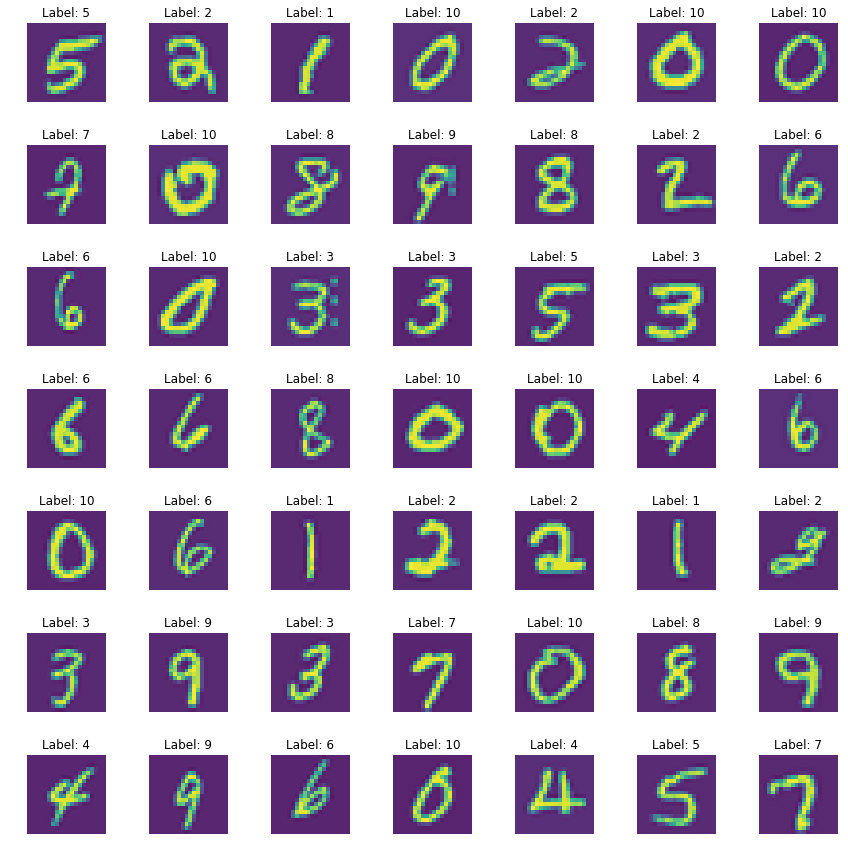

In [5]:
# PLotando dados
plot_data(X_train, y_train)

In [79]:
# Treinando modelo
lamda = 0.003
num_classes = len(np.unique(y))

theta = trainOneVsAll(X_train, y_train, num_classes, lamda)

Custo classe 1: 0.03414935850977738
Custo classe 2: 0.07902325002445935
Custo classe 3: 0.0853136937071129
Custo classe 4: 0.06449088177561806
Custo classe 5: 0.09411897236812583
Custo classe 6: 0.045671231196759296
Custo classe 7: 0.053261398650833805
Custo classe 8: 0.11839487784986064
Custo classe 9: 0.10463940132537496
Custo classe 10: 0.031974445437754746


In [81]:
# Predizendo com dados de teste
acc = predictOneVsAll(X_test, y_test, theta)
print(f'Acurácia final do modelo nos dados de teste: {(100*acc):.2f}%')

Acurácia final do modelo nos dados de teste: 89.80%


In [82]:
# Vejamos como a acurácia nos dados de teste muda conforme lambda
lamda = 0.1
num_classes = len(np.unique(y_train))

theta = trainOneVsAll(X_train, y_train, num_classes, lamda)
acc = predictOneVsAll(X_test, y_test, theta)
print(f'Acurácia final do modelo nos dados de teste: {(100*acc):.2f}%')

Custo classe 1: 0.03414986765513343
Custo classe 2: 0.07920263382264771
Custo classe 3: 0.08588437072437398
Custo classe 4: 0.06387061876910005
Custo classe 5: 0.09430656677052834
Custo classe 6: 0.04566845641723168
Custo classe 7: 0.05345105431901198
Custo classe 8: 0.11791706572703942
Custo classe 9: 0.10435921021881908
Custo classe 10: 0.03195346871192362
Acurácia final do modelo nos dados de teste: 89.90%


In [8]:
num_classes = len(np.unique(y_train))
lambdas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.5, 1, 3, 5, 10]
acc_list = []
for lamda in lambdas:
    theta = trainOneVsAll(X_train, y_train, num_classes, lamda)
    acc = predictOneVsAll(X_test, y_test, theta)
    acc_list.append(acc)

Custo classe 1: 0.03414934815592578
Custo classe 2: 0.07884929087408014
Custo classe 3: 0.08647931272362153
Custo classe 4: 0.06478210664736556
Custo classe 5: 0.09411892891792929
Custo classe 6: 0.045671305869465634
Custo classe 7: 0.05326842071197008
Custo classe 8: 0.12001112759874046
Custo classe 9: 0.10499608926882274
Custo classe 10: 0.03197508745483657
Custo classe 1: 0.03414935850977738
Custo classe 2: 0.07902325002445935
Custo classe 3: 0.0853136937071129
Custo classe 4: 0.06449088177561806
Custo classe 5: 0.09411897236812583
Custo classe 6: 0.045671231196759296
Custo classe 7: 0.053261398650833805
Custo classe 8: 0.11839487784986064
Custo classe 9: 0.10463940132537496
Custo classe 10: 0.031974445437754746
Custo classe 1: 0.034149394794684464
Custo classe 2: 0.07936177592554768
Custo classe 3: 0.0864257267352508
Custo classe 4: 0.06308407697974797
Custo classe 5: 0.09433739679271913
Custo classe 6: 0.04567097545675645
Custo classe 7: 0.053255403995423396
Custo classe 8: 0.1197

In [9]:
# Acurácias
acc_list

[0.898, 0.898, 0.9, 0.899, 0.899, 0.901, 0.9, 0.899, 0.901, 0.9, 0.899]

In [7]:
lambdas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.5, 1, 3, 5, 10]
acc_list = [0.898, 0.898, 0.9, 0.899, 0.899, 0.901, 0.9, 0.899, 0.901, 0.9, 0.899]

In [13]:
# Lambdas respectivos
lambdas[acc_list.index(max(acc_list))]

0.3

E também 3.

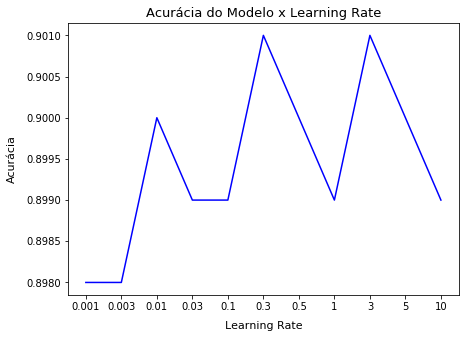

In [18]:
# Plotando
fig = plt.figure(figsize=(7, 5))
plt.plot(np.arange(11), acc_list, color='b')
plt.xticks(np.arange(11), lambdas)
plt.title('Acurácia do Modelo x Learning Rate', size=13)
plt.xlabel('Learning Rate', size=11, labelpad=9)
plt.ylabel('Acurácia', size=11, labelpad=9)
plt.show()

## Scikit Learn

Após toda a implementação utilizando as funcionalidades do ```numpy``` e do ```scipy```, vamos estudar a fundo o modelo de ```Regressão Logística``` do ```scikit-learn```. A ideia é repetir o procedimento acima desenvolvido, analisando critérios de performance, facilidade e aprimoramento.

In [19]:
# Importando bibliotecas
import numpy as np
import scipy.io as sio
import pandas as pd

# Lendo arquivo
data = sio.loadmat('ex3data1.mat')
X = data['X']
y = data['y']

In [21]:
# Embaralhando índices
m = X.shape[0]
indices = np.random.RandomState(seed=42).permutation(m)
indices

array([1501, 2586, 2653, ..., 3092, 3772,  860])

In [23]:
# Indexando 
X_shuffle = X[indices]
y_shuffle = y[indices]

In [ ]:
# Separando dados
from sklearn.model_selection import train_test_split

In [24]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int, None, optional
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, the value is set 

In [44]:
# Separando dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20,
                                                   random_state=42)

In [49]:
# Verificando
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print('- - - Treino - - -')
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de y_train: {y_train.shape}')
print('\n- - - Teste - - -')
print(f'Dimensões de X_test: {X_test.shape}')
print(f'Dimensões de y_test: {y_test.shape}')

- - - Treino - - -
Dimensões de X_train: (4000, 400)
Dimensões de y_train: (4000,)

- - - Teste - - -
Dimensões de X_test: (1000, 400)
Dimensões de y_test: (1000,)


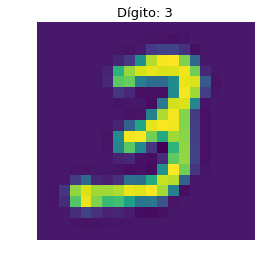

In [46]:
# Plotando dados
plt.imshow(X_train[1500].reshape(20, 20).T, cmap='viridis')
plt.axis('off')
plt.title(f'Dígito: {y[1500][0]}', size=13)
plt.show()

### Treinando um Modelo

In [48]:
# Importando classificador
from sklearn.linear_model import LogisticRegression

# Criando classificador (sem hiperparâmetros)
clf = LogisticRegression()

# Treinando modelo
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Medindo Performance

In [50]:
# Acurácia do modelo
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.89528796, 0.90404798, 0.89917231])

Níveis semelhantes ao encontrado via NumPy. Vejamos outras métricas.

In [55]:
# Score nos dados de treino
clf.score(X_test, y_test)

0.904

In [56]:
# Utilizando matriz de confusão para avaliar problemas pontuais
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(clf, X_test, y_test, cv=3)
confusion_matrix(y_test, predictions)

array([[102,   1,   0,   0,   1,   0,   1,   0,   0,   0],
       [  4,  83,   4,   4,   2,   2,   2,   3,   0,   1],
       [  0,   3,  71,   0,   3,   1,   1,   4,   2,   0],
       [  0,   4,   0,  81,   0,   1,   0,   2,   6,   0],
       [  3,   1,   5,   3,  80,   0,   0,   1,   2,   3],
       [  1,   2,   0,   0,   1,  90,   0,   1,   0,   3],
       [  4,   2,   0,   1,   1,   0,  95,   0,   8,   1],
       [  2,   1,   5,   1,   5,   2,   0,  63,   1,   1],
       [  0,   1,   2,   4,   0,   0,   6,   1,  97,   0],
       [  0,   0,   0,   0,   1,   2,   2,   1,   0, 105]], dtype=int64)

Na tentativa de aprimorar o modelo, vamos aplicar um procedimento de Normalização nos dados.

In [64]:
# Normalizando dados e retreinando modelo
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Realizando novo treinamento
cross_val_score(clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.868362  , 0.87406297, 0.87133183])

Não foi efetivo!

In [73]:
# Modificando um parâmetro
clf_mod = LogisticRegression(C=0.1)

cross_val_score(clf_mod, X_train, y_train, cv=3, scoring='accuracy')

array([0.88780853, 0.89655172, 0.89465764])

In [74]:
# Dinamizando matriz de confusão
predictions = cross_val_predict(clf, X_test, y_test, cv=3)
conf_mx = confusion_matrix(y_test, predictions)
conf_mx

array([[102,   1,   0,   0,   1,   0,   1,   0,   0,   0],
       [  4,  83,   4,   4,   2,   2,   2,   3,   0,   1],
       [  0,   3,  71,   0,   3,   1,   1,   4,   2,   0],
       [  0,   4,   0,  81,   0,   1,   0,   2,   6,   0],
       [  3,   1,   5,   3,  80,   0,   0,   1,   2,   3],
       [  1,   2,   0,   0,   1,  90,   0,   1,   0,   3],
       [  4,   2,   0,   1,   1,   0,  95,   0,   8,   1],
       [  2,   1,   5,   1,   5,   2,   0,  63,   1,   1],
       [  0,   1,   2,   4,   0,   0,   6,   1,  97,   0],
       [  0,   0,   0,   0,   1,   2,   2,   1,   0, 105]], dtype=int64)

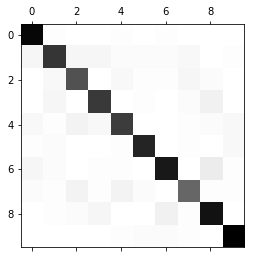

In [75]:
# Plotando matriz
plt.figure(figsize=(12, 6))
plt.matshow(conf_mx, cmap='binary')
plt.show()

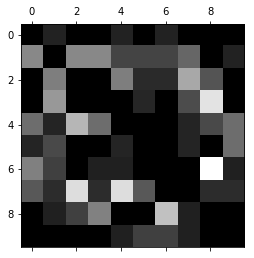

In [76]:
# Visualizando melhor
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Análise:

Através da Matriz de Confusão acima, é possível perceber que existem muitos dígitos **7** sendo confundidos com dígitos **2**, muitos dígitos **7** sendo confundidos com dígitos **4** e, talvez em uma situação mais crítica, muitos dígitos **6** sendo confundidos com dígitos **8**.

Vamos tentar plotar os dígitos classificados erroneamente.

In [ ]:
#

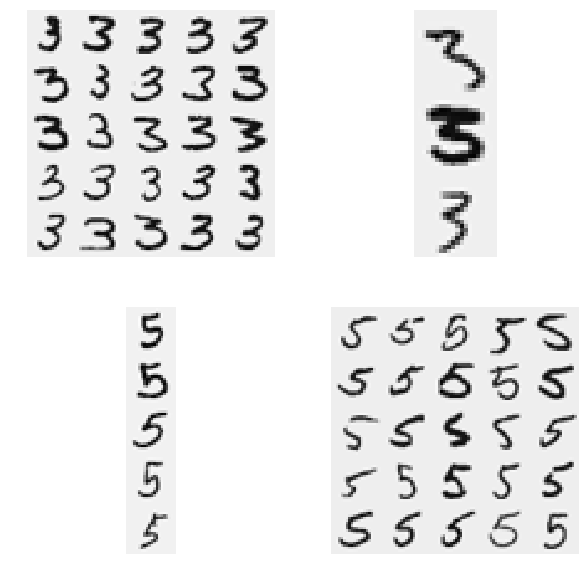

In [96]:
import matplotlib
# Analisando erros individuais (por que 6s são tão confundidos com 8s?)
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 20
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image.T, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
X_aa = X_test[(y_test == cl_a) & (predictions == cl_a)]
X_ab = X_test[(y_test == cl_a) & (predictions == cl_b)]
X_ba = X_test[(y_test == cl_b) & (predictions == cl_a)]
X_bb = X_test[(y_test == cl_b) & (predictions == cl_b)]

plt.figure(figsize=(10, 10))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

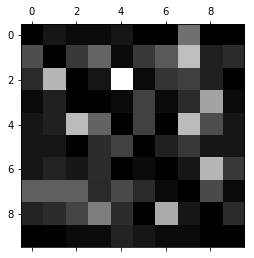

In [82]:
# Vejamos com os dados de treino
train_pred = cross_val_predict(clf, X_train, y_train, cv=3)
train_conf_mx = confusion_matrix(y_train, train_pred)
row_sums = train_conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = train_conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Nos dados de treino, a maior confusão se deu entre os dígitos 2 e 4.

In [86]:
train_conf_mx

array([[379,   2,   1,   1,   2,   0,   0,  10,   0,   0],
       [  7, 336,   5,   9,   1,   5,   8,  17,   3,   4],
       [  4,  17, 353,   2,  24,   1,   5,   6,   3,   0],
       [  1,   3,   0, 374,   1,   6,   1,   4,  15,   1],
       [  2,   3,  17,   9, 339,   6,   0,  17,   7,   2],
       [  2,   2,   0,   4,   6, 376,   3,   5,   2,   2],
       [  2,   3,   2,   4,   0,   1, 353,   2,  16,   5],
       [  9,   9,   9,   4,   7,   4,   1, 368,   7,   1],
       [  3,   4,   6,  11,   4,   0,  15,   2, 340,   4],
       [  0,   0,   1,   1,   3,   2,   1,   1,   0, 380]], dtype=int64)

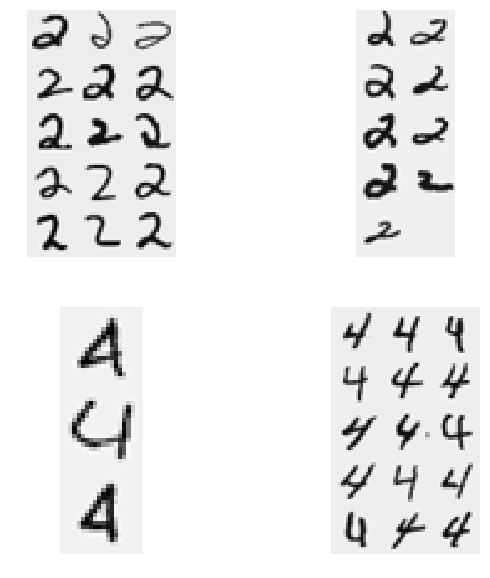

In [91]:
# Analisando erros individuais (por que 5s são tão confundidos com 3s?)
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 20
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image.T, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 2, 4
X_aa = X_train[(y_train == cl_a) & (train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (train_pred == cl_b)]

plt.figure(figsize=(10, 10))
plt.subplot(221); plot_digits(X_aa[:15], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:15], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:15], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:15], images_per_row=5)
plt.show()

### Pipeline Completo

In [1]:
# Importando bibliotecas
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Definindo funções

# Função para separação dos dados
def data_split(X, y, test_ratio):
    """ Função responsável pela separação do dataset em dados de Treino e Teste
    Input:
        X: features do modelo;
        y: label do modelo;
        test_ratio: porcentagem de dados de teste
    Output: X_train, X_teste, y_train, y_teste: dados separados"""
    
    # Embaralhando os dados
    m = X.shape[0]
    indices = np.random.RandomState(seed=42).permutation(m)
    X_shuffle = X[indices]
    y_shuffle = y[indices]
    
    # Separando os dados
    return train_test_split(X_shuffle, y_shuffle, 
                            test_size=test_ratio, random_state=42)

# Função para leitura e preparação dos dados
def data_prepare(test_ratio):
    """ Função responsável pela leitura e preparação dos dados
    Input:
        test_ratio: porcentagem de dados de teste.
    Output:
        X_train, X_test, y_train, y_test: dados separados"""
    
    # Lendo dados
    data = sio.loadmat('ex3data1.mat')
    X = data['X']
    y = data['y']
    
    return data_split(X, y, test_ratio=test_ratio)

# Função para plotagem dos dados
def plot_digit():
    """ Função por plotar um dígito aletório do conjunto de train"""
    
    rnd = np.random.randint(3999)
    plt.imshow(X_train[rnd].reshape(20, 20).T, cmap='viridis')
    plt.axis('off')
    plt.title(f'Dígito: {y_train[rnd]}', size=13)
    plt.show()
    
# Função para análise da Matriz de COnfusão
def plot_conf_matrix(y, predictions):
    """ Função responsável por mostrar a Matriz de Confusão analítica e gráfica
    Input:
        X: features
        y: label
        predictions: predições realizadas através da validação cruzada"""
    
    # Analítica
    conf_mx = confusion_matrix(y, predictions)
    print(conf_mx)
    print()
    
    # Gráfica
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

In [3]:
# Lendo e preparando dados
X_train, X_test, y_train, y_test = data_prepare(.20)

In [4]:
# Verificando
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

print('- - - Treino - - -')
print(f'Dimensões de X_train: {X_train.shape}')
print(f'Dimensões de y_train: {y_train.shape}')
print('\n- - - Teste - - -')
print(f'Dimensões de X_test: {X_test.shape}')
print(f'Dimensões de y_test: {y_test.shape}')

- - - Treino - - -
Dimensões de X_train: (4000, 400)
Dimensões de y_train: (4000,)

- - - Teste - - -
Dimensões de X_test: (1000, 400)
Dimensões de y_test: (1000,)


In [5]:
y_train

array([ 3,  7,  5, ...,  5, 10,  6], dtype=uint8)

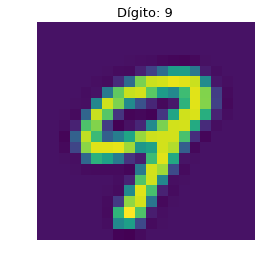

In [6]:
# Plotando dígito
plot_digit()

In [7]:
# Treinando modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Acurácia
accs = cross_val_score(clf, X_train, y_train, scoring='accuracy')
print(f'Scores: {accs}')
print(f'Score médio: {accs.mean():.2f}')

Scores: [0.90052356 0.9107946  0.89089541]
Score médio: 0.90


[[389   3   2   1   4   0   1   6   0   0]
 [ 10 330   2   7   1   8   6  14   5   4]
 [  2  11 343   1  22   1   7   6   5   1]
 [  2   7   0 379   0   5   0   3  19   1]
 [  4   2  22   9 327   7   0  12   5   4]
 [  1   5   0   2   7 370   0   1   2   3]
 [  8   4   0   6   1   0 369   0  10   3]
 [  8   8   8   5  10   3   2 341   5   2]
 [  4   2   7  12   5   1  12   3 349   5]
 [  0   1   1   2   2   2   0   0   2 406]]



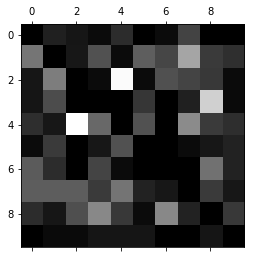

In [8]:
# Matriz de Confusão
predictions = cross_val_predict(clf, X_train, y_train, cv=3)
plot_conf_matrix(y_train, predictions)

Análise: 

Os pontos brancos indicam locais onde houveram um maior índice de erros na classificação de dígitos. Por exemplo, ao analisar a linha 4 e a coluna 2, é possível concluir que _dígitos que deveriam ser classificados como **2**, normalmente estão sendo classificados como **4**_!

In [9]:
# Tunando hiperparâmetros
param_grid = [
    {'C': np.logspace(0, 2, 10), 'penalty': ['l1', 'l2']}
]

# Classificador
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': array([  1.     ,   1.6681 ,   2.78256,   4.64159,   7.74264,  12.9155 ,
        21.54435,  35.93814,  59.94843, 100.     ]), 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [11]:
# Melhor performance
print(f'A melhor acurácia para o modelo é {grid_search.best_score_}')

A melhor acurácia para o modelo é 0.90075


[[389   3   2   1   4   0   1   6   0   0]
 [ 10 330   2   7   1   8   6  14   5   4]
 [  2  11 343   1  22   1   7   6   5   1]
 [  2   7   0 379   0   5   0   3  19   1]
 [  4   2  22   9 327   7   0  12   5   4]
 [  1   5   0   2   7 370   0   1   2   3]
 [  8   4   0   6   1   0 369   0  10   3]
 [  8   8   8   5  10   3   2 341   5   2]
 [  4   2   7  12   5   1  12   3 349   5]
 [  0   1   1   2   2   2   0   0   2 406]]



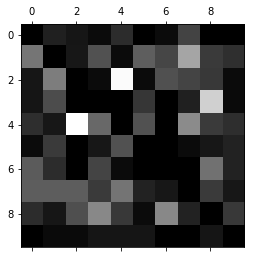

In [18]:
# Avaliando matriz de confusão 
model = grid_search.best_estimator_

pred = cross_val_predict(model, X_train, y_train, cv=3)
plot_conf_matrix(y_train, pred)

[[ 87   0   1   0   2   0   0   4   0   0]
 [  2  94   4   2   0   1   3   5   0   2]
 [  3   5  85   0   2   1   1   1   3   0]
 [  0   0   1  71   0   2   0   3   7   0]
 [  1   0   6   2  84   2   0   8   4   1]
 [  2   1   0   1   2 101   0   2   0   0]
 [  2   1   0   4   0   0  87   0   5   0]
 [  0   6   3   0   8   2   2  81   6   0]
 [  0   0   3   6   0   1   8   0  82   0]
 [  0   1   0   0   1   1   0   1   0  80]]



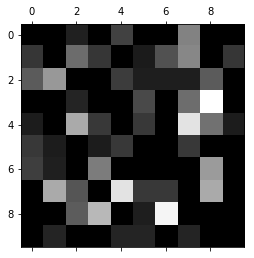

In [19]:
# Matriz de confusão nos dados de teste
test_pred = cross_val_predict(model, X_test, y_test, cv=3)
plot_conf_matrix(y_test, test_pred)

**Conclusão**:

A aplicação da classe ```GridSearchCV``` não foi tão efetiva, visto que a acurácia do modelo e as avaliações pontuais através da matriz de confusão não sofreram mudanças significativas.